In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# define dataset
df = pd.read_csv('mnist_dataset.csv')
df.sample(frac = 1) # shuffle
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# get the data labels
labels = df.loc[:, 'label']
labels = np.array(labels)

hot_encoded_labels = []
for label in labels:
    temp = np.zeros(10)
    temp[label] = 1
    hot_encoded_labels.append(temp)
    
labels = np.array(hot_encoded_labels)
labels.shape

(42000, 10)

In [3]:
# drop the data labels
df = df.drop('label', axis=1)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# scale data
data = np.array(df)

scaler = MinMaxScaler()
X = scaler.fit_transform(data)
X.shape

(42000, 784)

In [5]:
X_train = X[:33600]
Y_train = labels[:33600]

X_test = X[-8400:]
Y_test = labels[-8400:]

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(33600, 784)
(33600, 10)
(8400, 784)
(8400, 10)


In [6]:
import nnet

def get_accuracy(Y, Y_hat):
    return np.sum(np.argmax(Y, 0) == np.argmax(Y_hat, 0)) / Y.shape[1]

model = nnet.Sequential([
    nnet.layers.Dense((784, 12), nnet.activation.ReLu),
    nnet.layers.Dense((12, 10), nnet.activation.ReLu),
    nnet.layers.Dense((10, 10), nnet.activation.Softmax)
])

# train the model
model.fit(X_train, Y_train, 800, nnet.loss.CategoricalCrossEntropy, nnet.optimizers.Adam(), accuracy_metric=get_accuracy, X_val=X_test, Y_val=Y_test)

Epoch: 1 Loss: 320965.26612793433 Validation Loss: 80371.74498314969 Accuracy: 0.12720238095238096
Epoch: 2 Loss: 252111.40786887778 Validation Loss: 63048.48125896872 Accuracy: 0.12217261904761904
Epoch: 3 Loss: 200258.9249261522 Validation Loss: 50021.9874475502 Accuracy: 0.11660714285714285
Epoch: 4 Loss: 163376.24785675955 Validation Loss: 40867.96008797464 Accuracy: 0.11217261904761905
Epoch: 5 Loss: 137411.00641055382 Validation Loss: 34441.1922901151 Accuracy: 0.11357142857142857
Epoch: 6 Loss: 118377.55406543355 Validation Loss: 29664.459320515518 Accuracy: 0.12318452380952381
Epoch: 7 Loss: 104324.39789138621 Validation Loss: 26104.50964029099 Accuracy: 0.13729166666666667
Epoch: 8 Loss: 94424.13096069003 Validation Loss: 23629.117698070015 Accuracy: 0.1574107142857143
Epoch: 9 Loss: 87877.94962293266 Validation Loss: 21998.35631067431 Accuracy: 0.17809523809523808
Epoch: 10 Loss: 83644.89847357356 Validation Loss: 20974.748057813063 Accuracy: 0.19014880952380953
Epoch: 11 Los

In [7]:
# get test accuracy
get_accuracy(Y_test.T, model.predict(X_test))

0.9108333333333334

In [8]:
# test model
import matplotlib.pyplot as plt

def test_prediction(index: int):
    current = np.array([X_test[index]])
    
    y_pred = model.predict(current)
    print('Prediction', np.argmax(y_pred, 0)[0])
    print('Label', np.argmax(Y_test[index]))
    
    current_image = current.T.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction 7
Label 7


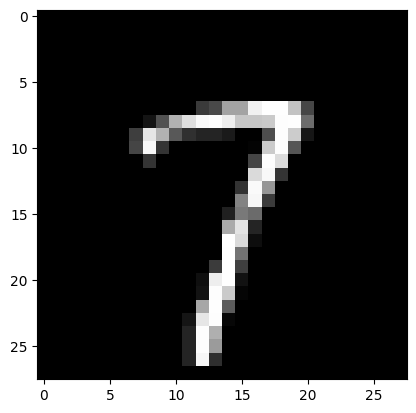

In [9]:
test_prediction(2)

Prediction 9
Label 9


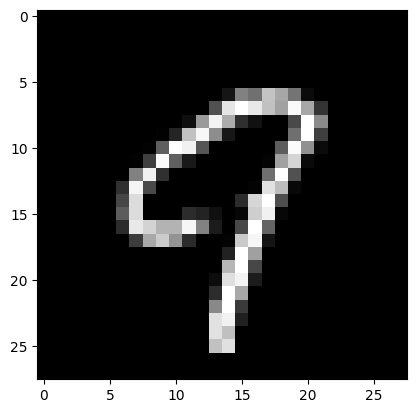

In [10]:
test_prediction(122)

Prediction 3
Label 3


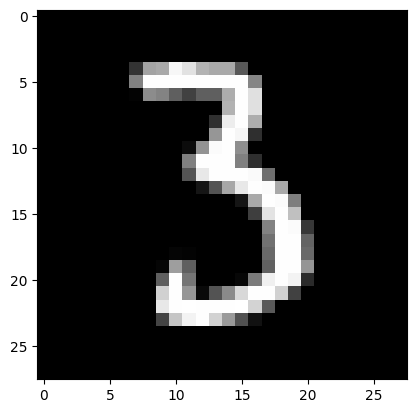

In [11]:
test_prediction(54)

Prediction 6
Label 6


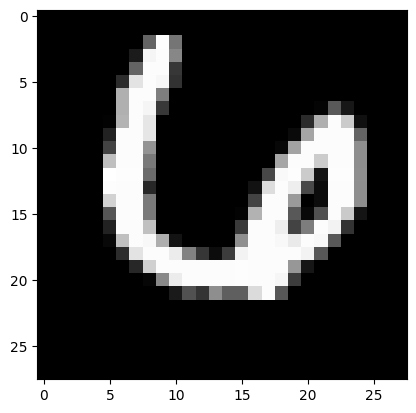

In [12]:
test_prediction(61)

Prediction 8
Label 8


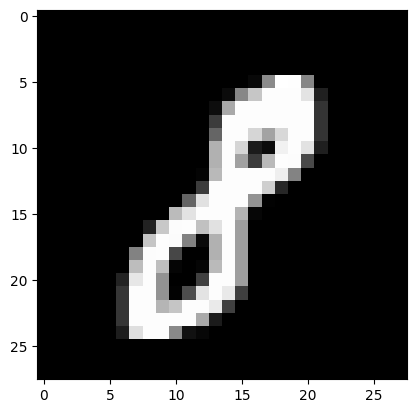

In [13]:
test_prediction(39)

Prediction 5
Label 5


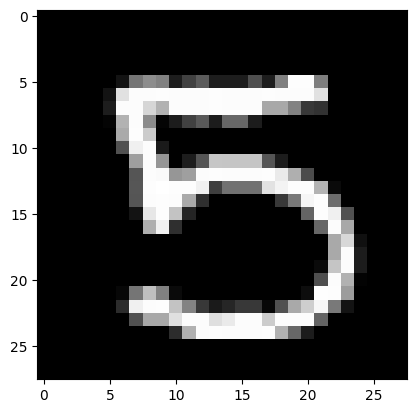

In [14]:
test_prediction(9)